In [ ]:
# Examen Segundo Parcial 
# Andrea Mercado Jiménez

In [71]:
import pandas as pd

In [72]:
import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)

In [73]:
import pandas as pd 
pd.__version__ 

'2.2.2'

In [74]:
!pip install matplotlib

In [75]:
import sys 
print(sys.executable)

C:\Users\andim\miniconda3\python.exe


In [76]:
import pandas as pd
import numpy as np
import pandas as pd

In [97]:
# Cargar base de datos 
import pandas as pd 
ruta_archivo = r"C:\\Users\\andim\\OneDrive\\Escritorio\\Quinto Semestre\\Modelos Computacionales\\1- mental-illnesses-prevalence.csv"
df = pd.read_csv(ruta_archivo)

df.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [98]:
# Crear un diccionario con los nombres antiguos como claves y los nuevos nombres como valores
nuevos_nombres = {
    "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized": "Schizophrenia disorders",
    "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized": "Depressive disorders",
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized": "Anxiety disorders",
    "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized": "Bipolar disorders",
    "Eating disorders (share of population) - Sex: Both - Age: Age-standardized": "Eating disorders"
}

# Renombrar las columnas usando el método .rename()
df = df.rename(columns=nuevos_nombres)

# Verificar los cambios mostrando los nombres de las columnas
print(df.columns)

Index(['Entity', 'Code', 'Year', 'Schizophrenia disorders',
       'Depressive disorders', 'Anxiety disorders', 'Bipolar disorders',
       'Eating disorders'],
      dtype='object')


In [99]:
# Crear una función llamada "df_ordered" que reciba un dataframe y un str y retorne un dataframe ordenado de mayor a menor considerando la característica str
def df_ordered(dataframe, nombre_columna):
    if nombre_columna in dataframe.columns:
        return dataframe.sort_values(by=nombre_columna, ascending=False)
    else:
        return f"La columna '{nombre_columna}' no existe en el dataframe."

In [100]:
df_ordered_result = df_ordered(df, 'Eating disorders')
df_ordered_result.head()

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
389,Australia,AUS,2019,0.388646,4.382458,5.815165,1.125061,1.031688
388,Australia,AUS,2018,0.388518,4.360289,5.820752,1.125041,1.028413
387,Australia,AUS,2017,0.388469,4.360807,5.812073,1.125032,1.025406
386,Australia,AUS,2016,0.388526,4.440195,5.677490,1.125020,1.020526
385,Australia,AUS,2015,0.388578,4.534077,5.544162,1.125010,1.015827


In [101]:
import matplotlib.pyplot as plt

# Crear una función llamada "plot_bar" que reciba un dataframe y un str y haga el plot de barras de ese dataframe considerando esa caracterísitca descrita por el string
def plot_bar(dataframe, nombre_columna):
    if nombre_columna in dataframe.columns:
        plt.figure(figsize=(10,6))
        plt.bar(dataframe['Entity'], dataframe[nombre_columna],
        color='pink')
        plt.xlabel('Entity')
        plt.ylabel(nombre_columna)
        plt.title(f'Grafico de barras de: {nombre_columna}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else: 
        print(f"La columna '{nombre_columna}' no existe en el dataframe.")

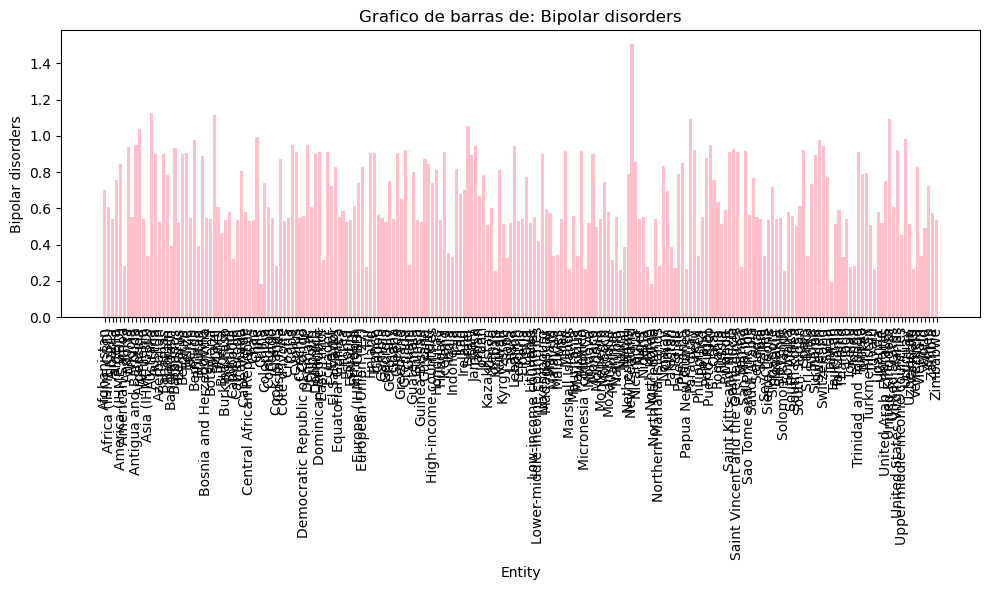

In [102]:
plot_bar(df, 'Bipolar disorders')

In [105]:
# Países con mayor depresión
df['Depressive disorders'].replace("<0.1", 0.1).apply(pd.to_numeric, errors='coerce')

depresion_paises = df.groupby('Entity')['Depressive disorders'].sum()

print(depresion_paises)

Entity
Afghanistan           149.042151
Africa (IHME GBD)     136.739586
Albania                73.038789
Algeria               123.967471
America (IHME GBD)    110.756721
                         ...    
Vietnam                76.130376
World                 105.355325
Yemen                 146.912638
Zambia                125.735835
Zimbabwe              100.373028
Name: Depressive disorders, Length: 214, dtype: float64


In [106]:
top8_depresion = depresion_paises.nlargest(8)
print('8 paises con el valor más alto de depresión', top8_depresion)

8 paises con el valor más alto de depresión Entity
Uganda                      214.289735
Palestine                   199.895248
Greenland                   188.616746
Central African Republic    179.397007
Angola                      175.337322
Equatorial Guinea           175.025261
Congo                       174.495063
Gabon                       170.172341
Name: Depressive disorders, dtype: float64


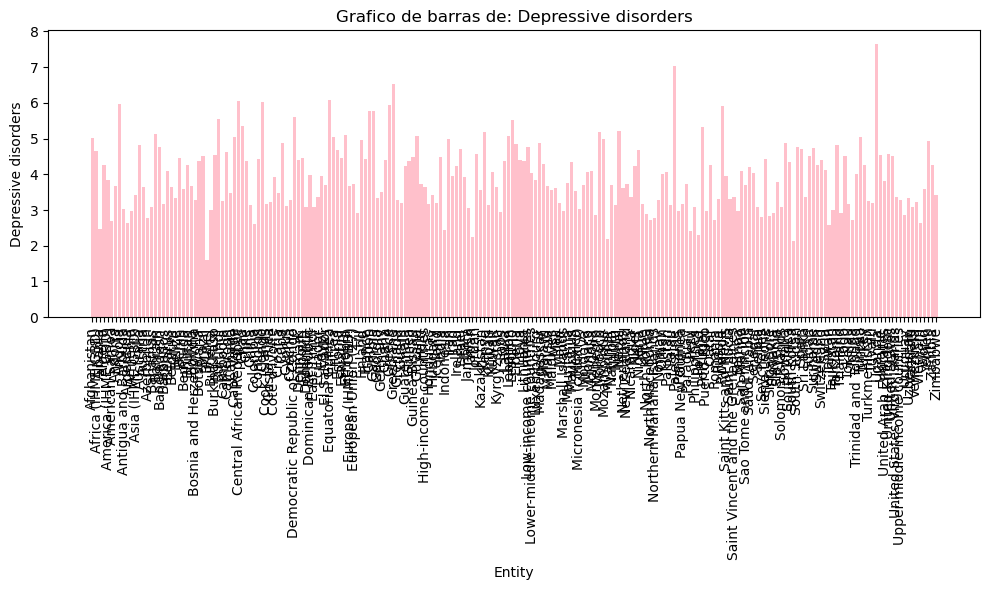

In [107]:
# Gráfica de barras mostrando el valor de depresión y la entidad (país)
plot_bar(df, 'Depressive disorders')

In [108]:
# Países con mayor desorden alimenticio
df['Eating disorders'] = df ['Eating disorders'].replace("<0.1", 0.1).apply(pd.to_numeric, errors='coerce')
TCA_paises = df.groupby('Entity')['Eating disorders'].sum()
print(TCA_paises)

Entity
Afghanistan           3.206056
Africa (IHME GBD)     3.383387
Albania               3.418702
Algeria               5.851010
America (IHME GBD)    8.984045
                        ...   
Vietnam               2.263044
World                 4.745392
Yemen                 4.034012
Zambia                3.011127
Zimbabwe              3.074208
Name: Eating disorders, Length: 214, dtype: float64


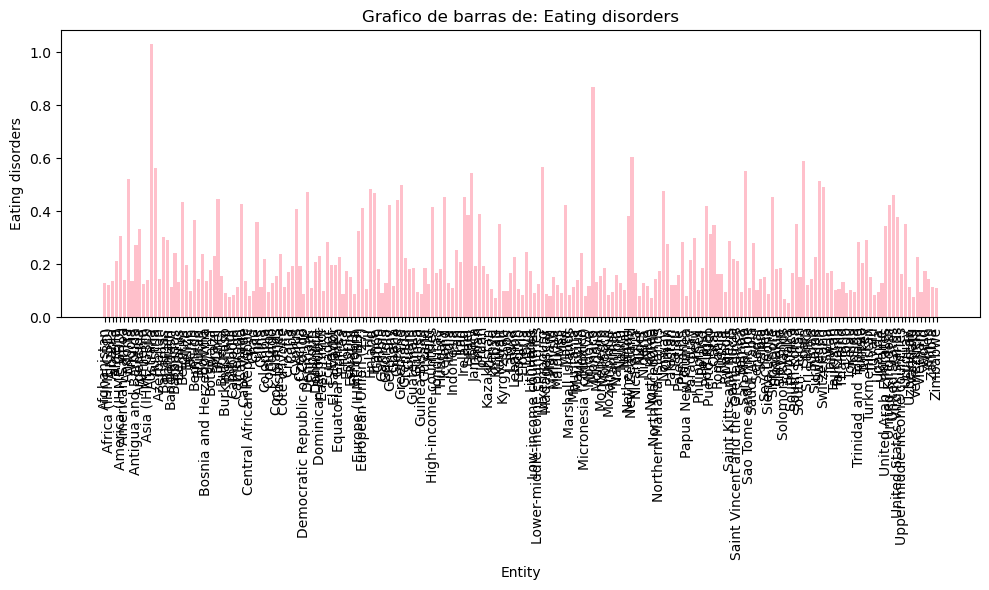

In [109]:
# Gráfica de barras mostrando el valor de desorden alimenticio y la entidad (país)
plot_bar(df, 'Eating disorders')

In [43]:
top8_TCA = TCA_paises.nlargest(8)
print('8 paises con el valor más alto de TCA', top8_TCA)

8 paises con el valor más alto de TCA Entity
Australia      26.688620
Monaco         23.158898
New Zealand    16.944654
Spain          16.130305
Italy          15.992242
Luxembourg     15.535935
San Marino     15.357607
Austria        15.155793
Name: Eating disorders (share of population) - Sex: Both - Age: Age-standardized, dtype: float64


In [44]:
# Países con mayor esquizofrenia
df['Schizophrenia disorders'] = df['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].replace("<0.1", 0.1).apply(pd.to_numeric, errors='coerce')
esquizofrenia_paises = df.groupby('Entity')['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].sum()
print(esquizofrenia_paises)

Entity
Afghanistan            6.514178
Africa (IHME GBD)      6.595280
Albania                8.500528
Algeria                7.471716
America (IHME GBD)    10.259163
                        ...    
Vietnam                9.437347
World                  8.666304
Yemen                  6.929568
Zambia                 6.272372
Zimbabwe               6.134306
Name: Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized, Length: 214, dtype: float64


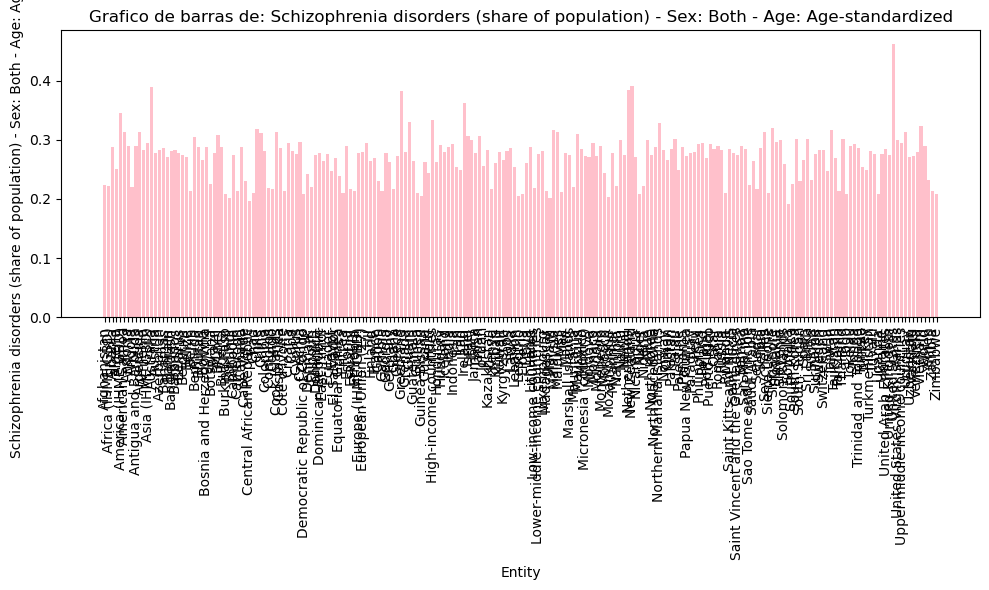

In [47]:
# Gráfica de barras mostrando el valor de esquizofrenia y la entidad (país)
plot_bar(df, 'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized')

In [110]:
top8_esquizofrenia = esquizofrenia_paises.nlargest(8)
print('8 paises con el valor más alto de esquizofrenia', top8_esquizofrenia) 

8 paises con el valor más alto de esquizofrenia Entity
United States            13.484385
New Zealand              11.684841
Australia                11.656592
Netherlands              11.381233
Greenland                11.359072
Ireland                  10.780793
America (IHME GBD)       10.259163
High-income countries     9.914049
Name: Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized, dtype: float64


In [112]:
# Crear un data frame con los valores por país de ["Entity Code", "Year", "Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
columnas = ["Entity", "Code", "Year", "Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
df_selected = df[columnas]
df_selected.head()

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [113]:
# Mostrar los estadísticos del dataframe anterior
df_selected.describe(include='all')

,Entity,Code,Year,Schizophrenia disorders,Depressive disorders,Anxiety disorders,Bipolar disorders,Eating disorders
count,6420,6150,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000,6420.000000
unique,214,205,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN
freq,30,30,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.500000,0.266604,3.767036,4.101840,0.636968,0.195664
std,NaN,NaN,8.656116,0.039383,0.925286,1.050543,0.233391,0.138380
min,NaN,NaN,1990.000000,0.188416,1.522333,1.879996,0.181667,0.044780
25%,NaN,NaN,1997.000000,0.242267,3.080036,3.425846,0.520872,0.096416
50%,NaN,NaN,2004.500000,0.273477,3.636772,3.939547,0.579331,0.144150
75%,NaN,NaN,2012.000000,0.286575,4.366252,4.564164,0.844406,0.251167


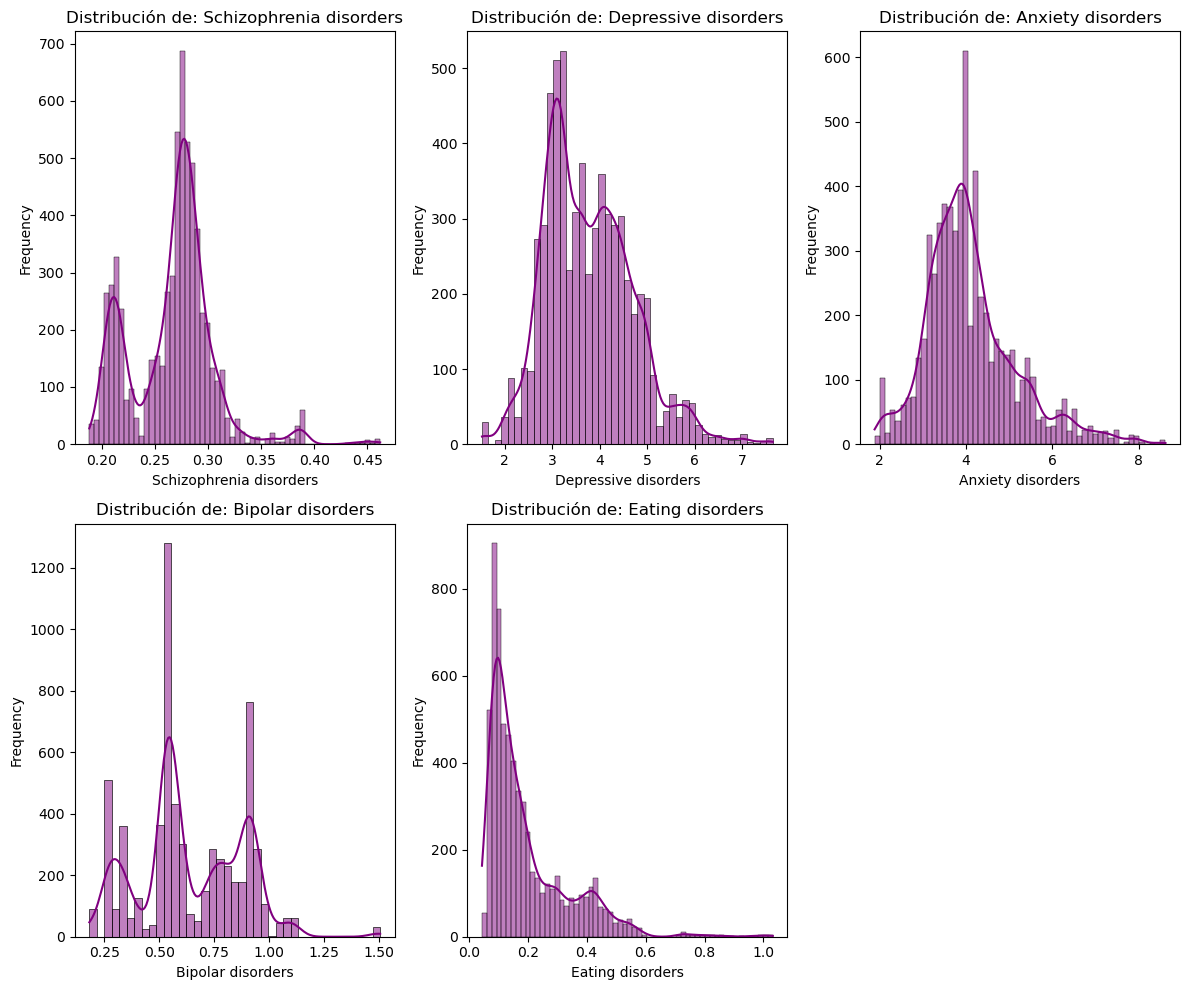

In [114]:
# Mostrar la distribución de cada feature del dataframe anterior
import seaborn as sns
plt.figure(figsize=(12, 10))

columns_to_plot = ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]

for m, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, m)
    sns.histplot(df_selected[col], kde=True, color='purple')
    plt.title(f'Distribución de: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

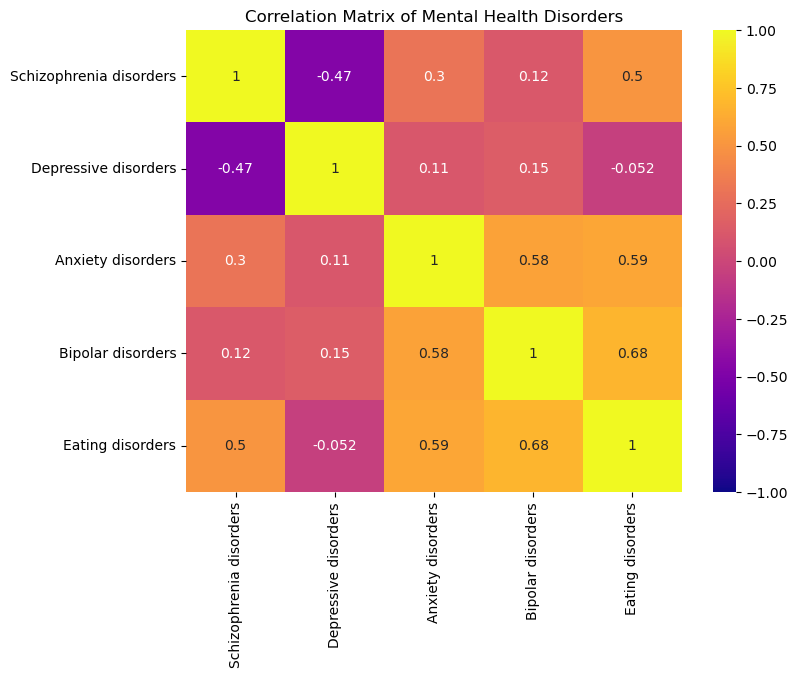

In [115]:
# Mostrar en un mapa de color la correlación entre las features ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]
col_data = ["Schizophrenia disorders", "Depressive disorders", "Anxiety disorders", "Bipolar disorders", "Eating disorders"]

df_nueva = df[col_data].dropna()

corr_mat = df_nueva.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap='plasma', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Mental Health Disorders')
plt.show()

In [125]:
# Del dataset cancer_reg visto en clase, determinar:

archivo_cancer = r"C:\\Users\\andim\\OneDrive\\Escritorio\\Quinto Semestre\\Modelos Computacionales\\cancer_reg.csv"
df = pd.read_csv(archivo_cancer)
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [124]:
# La correlación entre las features [ 'target_deathrate', 'avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome', 'povertypercent', 'pctprivatecoverage', 'pctpubliccoverage' ]

columnas = ['target_deathrate', 'avganncount', 'avgdeathsperyear','incidencerate', 'medincome', 'povertypercent','pctprivatecoverage', 'pctpubliccoverage']
matrix = df[columnas].corr()
matrix

,target_deathrate,avganncount,avgdeathsperyear,incidencerate,medincome,povertypercent,pctprivatecoverage,pctpubliccoverage
target_deathrate,1.000000,-0.143532,-0.090715,0.449432,-0.428615,0.429389,-0.386066,0.404572
avganncount,-0.143532,1.000000,0.939408,0.073553,0.269145,-0.135694,0.132244,-0.173548
avgdeathsperyear,-0.090715,0.939408,1.000000,0.062690,0.223207,-0.066918,0.056183,-0.131687
incidencerate,0.449432,0.073553,0.062690,1.000000,-0.001036,0.009046,0.105174,0.046109
medincome,-0.428615,0.269145,0.223207,-0.001036,1.000000,-0.788965,0.724175,-0.754822
povertypercent,0.429389,-0.135694,-0.066918,0.009046,-0.788965,1.000000,-0.822534,0.651162
pctprivatecoverage,-0.386066,0.132244,0.056183,0.105174,0.724175,-0.822534,1.000000,-0.720012
pctpubliccoverage,0.404572,-0.173548,-0.131687,0.046109,-0.754822,0.651162,-0.720012,1.000000


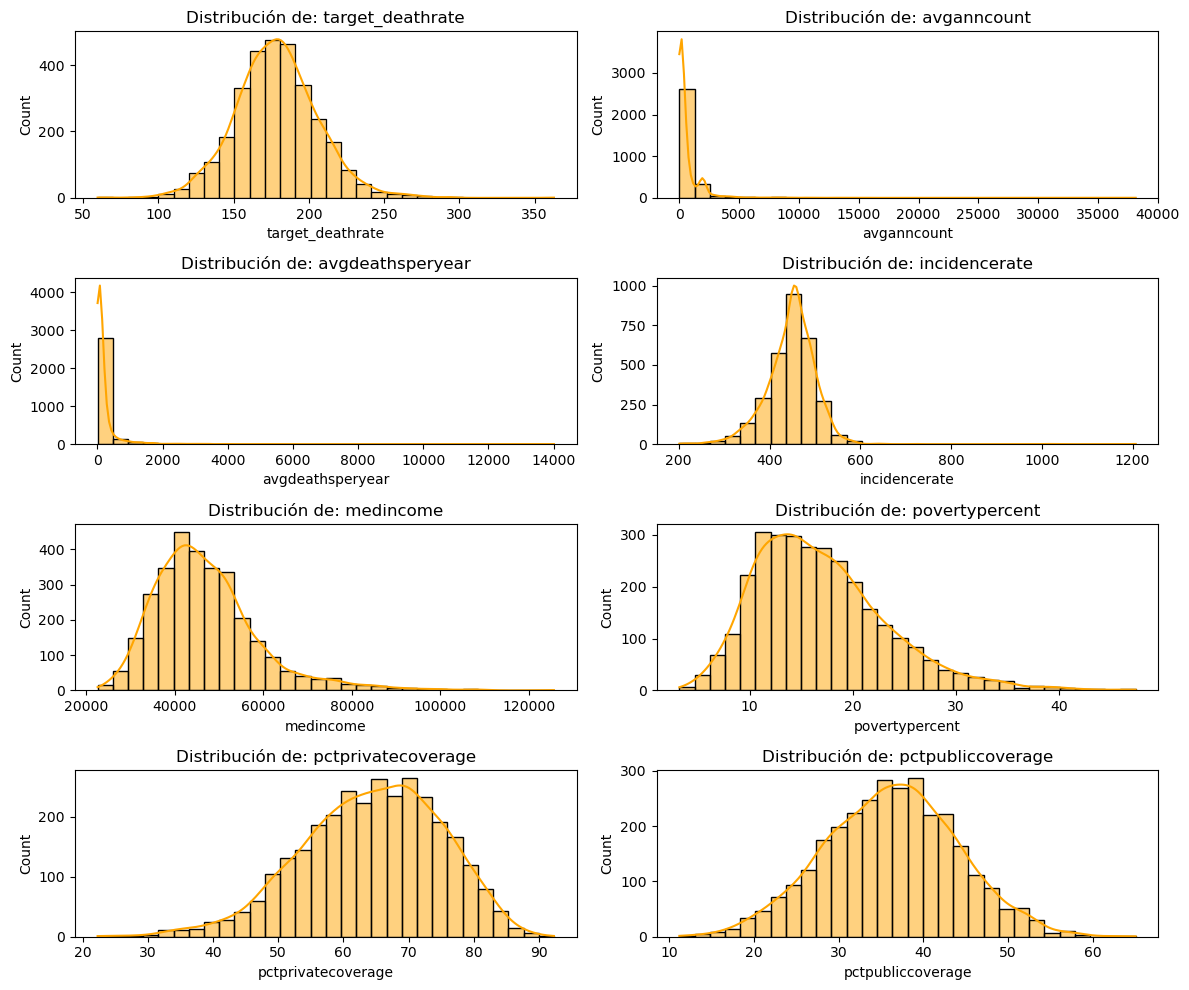

In [123]:
# Mostrar la distribución de cada feature del dataframe anterior
plt.figure(figsize=(12, 10))
for i, column in enumerate(columnas, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[column], kde=True, bins=30, color= 'orange')
    plt.title(f'Distribución de: {column}')
    plt.tight_layout()

plt.show()

In [126]:
!pip install scipy

In [130]:
from scipy.stats import linregress

# Filtrar solo las columnas numéricas
df_numeric = df.select_dtypes(include='number')

# Verifica si hay datos faltantes
print("Datos faltantes:\n", df_numeric.isnull().sum())

# Opcional: Elimina filas con valores faltantes (si aplica)
df_numeric = df_numeric.dropna()

# Generar la matriz de correlación solo con datos numéricos
matrix = df_numeric.corr()

# Definir un umbral para relaciones lineales fuertes
threshold = 0.7 

# Encontrar pares de columnas con correlación fuerte
columnas_sel = df_numeric.columns  # Seleccionar columnas numéricas
corr_alta = [
    (col1, col2) for col1 in columnas_sel for col2 in columnas_sel
    if col1 != col2 and abs(matrix.loc[col1, col2]) > threshold
]

# Calcular la regresión lineal para cada par altamente correlacionado
for col1, col2 in corr_alta:
    slope, intercept, r_value, p_value, std_err = linregress(df_numeric[col1], df_numeric[col2])
    print(f"Linear regression between {col1} and {col2}:")
    print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}\n")

Datos faltantes:
 avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
medianage                     0
medianagemale                 0
medianagefemale               0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarriedhouseholds          0
birthrate             